<h1 style="color: black; background-color: white; width: 30vw">SETUP FUNCTIONS</h1>

In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

dayHeights = []
times = []
heights = []

def cleanTime(timeStr):

    newTime = timeStr.split(":")
    mins = int(newTime[1])/60
    correctTime = round(float(newTime[0]) + mins, 2)
    return correctTime


def cleanDays():

    for height in range(len(heights)):
        if height != 0 and height % 2 != 0:
            dayHeights.append((heights[height] + heights[height - 1])/2)


with open('ASTR19_F25_group_project_data.txt', 'r') as f:
    for line in f:
        if "#" not in line:
            dataArr = line.strip().split()
            times.append(cleanTime(dataArr[1]))
            heights.append(float(dataArr[2]))

cleanDays()

def basicFunc(times, a, f, shift, offset):
    return a * np.cos(f * times + shift) + offset

def getStd(heightsArr):
    mean = np.sum(heightsArr) / len(heightsArr)
    variance = np.sum((heightsArr - mean) ** 2) / (len(heightsArr) - 1)
    standardDev = np.sqrt(variance)
    return standardDev


<h1 style="color: black; background-color: white; width: 25vw">INTER DAY PLOT</h1>

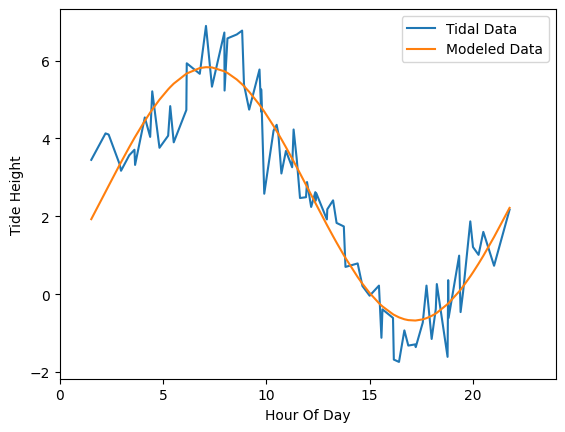

In [4]:
fig, axies = plt.subplots()

timesArr = np.array(times)
heightsArr = np.array(heights)

idxArr = np.argsort(timesArr)
sortedTimes = timesArr[idxArr]
sortedHeights = heightsArr[idxArr]

amplitude = .5 * (sortedHeights.max() - sortedHeights.min()) #Because thats how you calculate amplitude 

popt, __ = curve_fit(basicFunc, sortedTimes, sortedHeights, sigma=.25*np.ones_like(sortedHeights), p0=[amplitude, 0, 0, 0])

model = basicFunc(sortedTimes, popt[0], popt[1], popt[2], popt[3])

axies.plot(sortedTimes, sortedHeights, label="Tidal Data")
axies.plot(sortedTimes, model, label="Modeled Data")

axies.set_xlim(0, 24)
axies.set_xlabel("Hour Of Day")
axies.set_ylabel("Tide Height")
axies.legend()

plt.savefig("Inter-Day-Plot.pdf")
plt.show()

<h1 style="color: black; background-color: white; width: 50vw">INTER DAY RESIDUAL HISTOGRAM</h1>

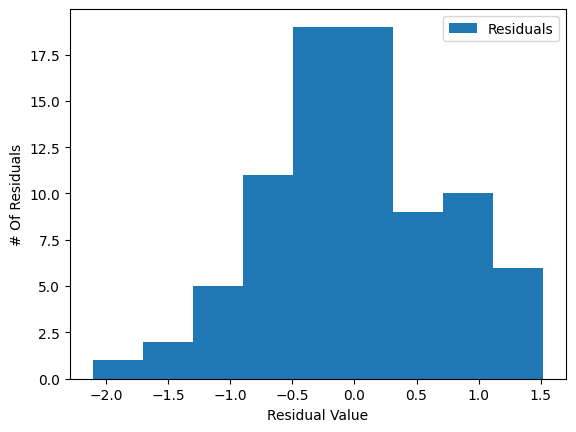

The estimated inter day intrisic scatter is 2.3822089058904607
It is True that the intrisic scatter is larger than the assumed experimental error


In [5]:
fig, axies = plt.subplots()

timesArr = np.array(times)
heightsArr = np.array(heights)

idxArr = np.argsort(timesArr)
sortedTimes = timesArr[idxArr]
sortedHeights = heightsArr[idxArr]

amplitude = .5 * (sortedHeights.max() - sortedHeights.min()) #Because thats how you calculate amplitude 

popt, __ = curve_fit(basicFunc, sortedTimes, sortedHeights, sigma=.25*np.ones_like(sortedHeights), p0=[amplitude, 2 * np.pi / 14, 0, 0])

model = basicFunc(sortedTimes, popt[0], popt[1], popt[2], popt[3])

residuals = []

for time in range(len(model)):
    residuals.append(sortedHeights[time] - model[time])


axies.hist(residuals, bins=int(np.sqrt(len(residuals))), label="Residuals")

axies.set_xlabel("Residual Value")
axies.set_ylabel("# Of Residuals")
axies.legend()

plt.savefig("Inter-Day-Hist.pdf")
plt.show()

standardDev = getStd(heightsArr)
intrisicScatter = ((standardDev ** 2) - (.25 ** 2)) ** 0.5

print(f"The estimated inter day intrisic scatter is {intrisicScatter}")
print(f"It is {intrisicScatter > 0.25} that the intrisic scatter is larger than the assumed experimental error")